# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for regression
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202201

In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\U7W20E6\AppData\Local\Temp/ipykernel_11452/2729461129.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [30]:
def create_data(m, N=50, visualize=False):
    x = torch.randn(N,1)
    y = m*x + torch.randn(N,1)/2

    if visualize:
        plt.plot(x,y,'s')
        plt.show()
    return x, y


def build_model():
    ANNreg = nn.Sequential(
        nn.Linear(1,1),  # input layer
        nn.ReLU(),       # activation function
        nn.Linear(1,1)   # output layer
        )
    return ANNreg


def train_model(model, x, y, learning_rate = 0.05, numepochs = 500):
    # loss function
    lossfun = nn.MSELoss()

    # optimizer (the flavor of gradient descent to implement)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    # train the model
    losses = torch.zeros(numepochs)

    ## Train the model!
    for epochi in range(numepochs):
        # forward pass
        yHat = model(x)

        # compute loss
        loss = lossfun(yHat,y)
        losses[epochi] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return model, losses


def evaluate(model, x, y, losses, numepochs = 500, visualize = False):
    # manually compute losses
    # final forward pass
    predictions = model(x)

    # final loss (MSE)
    testloss = (predictions-y).pow(2).mean()
    final_loss = testloss.detach()

    if visualize:
        plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
        plt.plot(numepochs, final_loss, 'ro')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Final loss = %g' %testloss.item())
        plt.show()
    return final_loss, predictions


def plot_data(x, y, predictions):
    plt.plot(x,y,'bo',label='Real data')
    plt.plot(x,predictions.detach(),'rs',label='Predictions')
    plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
    plt.legend()
    plt.show()

In [69]:
N = 50
exp_N = 50
slopes = torch.linspace(-2, 2, 21)[:, None]
final_losses = torch.zeros((len(slopes), 1))
correlation = torch.zeros((len(slopes), 1))

for i, m in enumerate(slopes):
    exp_losses = torch.zeros(exp_N)
    exp_correlations = torch.zeros(exp_N)
    for j in range(exp_N):
        x, y = create_data(m)
        model = build_model()
        model, losses = train_model(model, x, y)
        final_loss, predictions = evaluate(model, x, y, losses)
        exp_losses[j] = final_loss
        exp_correlations[j] = torch.corrcoef(torch.cat((y, predictions), 1).T)[0, 1]
    # print(predictions)
    final_losses[i] = exp_losses.nanmean()
    correlation[i] = exp_correlations.nanmean()


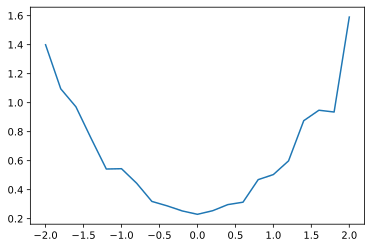

In [70]:
plt.plot(slopes, final_losses)

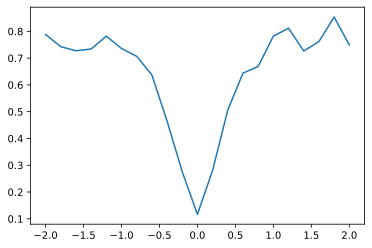

In [71]:
plt.plot(slopes, correlation)